-- Rehaussement du contraste :


Transfertnation par étiretnent d 'histogramme
Avant de s'attaquer å I'étirelnent de I •histogramme d'une image, regardons tout d'abords
comment calculer un histogramme d' une Image Pour cela on utiliser la fonction list
de cv2 qui prend l'image onginale, canal (RGB), le masque (None), le nombre d'mtervalles
(bins = 256), et l'intervalle de pixel en paramétres.

### 7. Tracer l'histogramme d'une image couleur. Prenez par exemple l'image autumn.tif

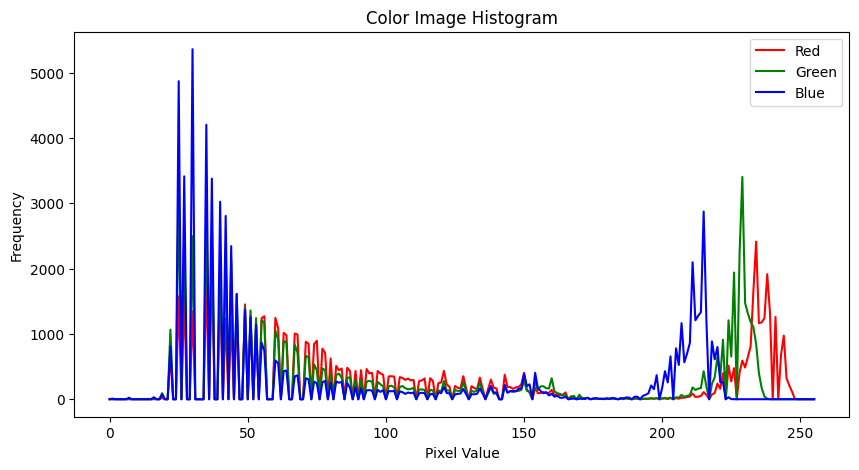

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Load the color image
image_path = "./images/autumn.tif"
image = cv2.imread(image_path)

# Convert the image to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Calculate the histogram for each color channel
histogram_red = cv2.calcHist([image_rgb], [0], None, [256], [0, 256])
histogram_green = cv2.calcHist([image_rgb], [1], None, [256], [0, 256])
histogram_blue = cv2.calcHist([image_rgb], [2], None, [256], [0, 256])

# Plot the histograms
plt.figure(figsize=(10, 5))
plt.plot(histogram_red, color='red', label='Red')
plt.plot(histogram_green, color='green', label='Green')
plt.plot(histogram_blue, color='blue', label='Blue')
plt.title('Color Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


The histogram associated with an image with relatively good exposure presents a distribution of pixels across the entire intensity range [0, 255]. To correct exposure-related defects in an image, it is sufficient to stretch its histogram. The objective is to extend the values of gray levels of the underexposed image, predominantly distributed in a sub-interval [Imin, Imax] where Imin = 10 and Imax = 255, to the entire available range.

This transformation can be done linearly or non-linearly. In the simple linear case, the value of each pixel is replaced by the result of the formula below.


$
                                    \text{{NewPixelValue}} = \frac{{\text{{PixelValue}} - \text{{Imin}}}}{{\text{{Imax}} - \text{{Imin}}}} \times (\text{{255}} )
$


ou bien l'axe des abscisses (x, y) et l'axe des ordonnées (x, y) respectivement dans
un espace 2D exposé à la lumière.
Les valeurs de x et y représentent les coordonnées des pixels,
et on peut déplacer un pixel en changeant ses coordonnées
dans cet espace.


### 8. Réaliser une fonction permettant d'étirer (Contrast Stretching) une image par une transformation linéaire (utilisation de LUT par exemple)


In [24]:

def changeContrastOptimized(imgMat):
    max_val = np.max(imgMat)
    min_val = np.min(imgMat)
    lut = np.array([(255 / (max_val - min_val)) * (i - min_val) for i in range(256)])
    new_img = lut[imgMat]
    return new_img


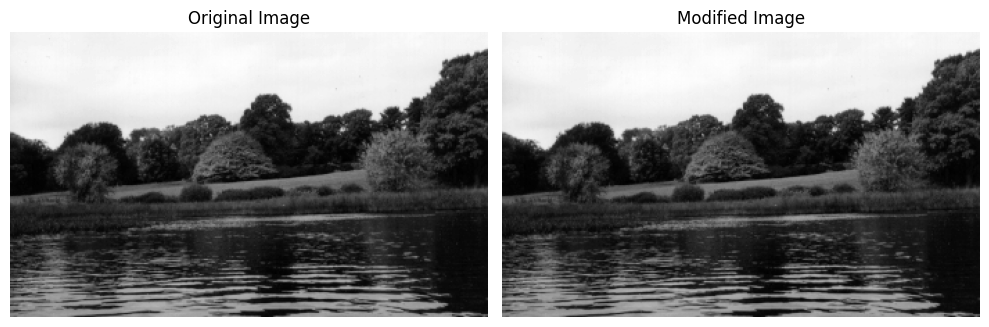

In [25]:

# Load the image
image_path = "./images/autumn.tif"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply the changeContrastOptimized function
new_image = changeContrastOptimized(image)

# Display the original and modified images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(new_image, cmap='gray')
plt.title('Modified Image')
plt.axis('off')
plt.tight_layout()
plt.show()


Appliquer cette transformation sur les images en niveaux de gris cameraman.tif et autumn.tif pour améliorer le contraste et l'apparence de chaque image.


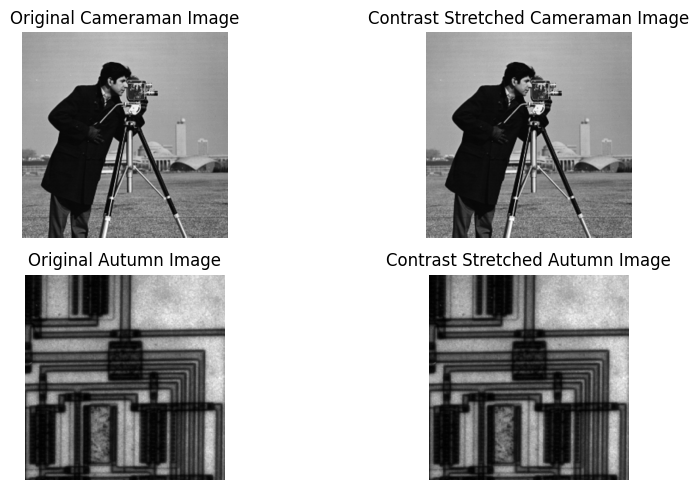

In [26]:

# Load the images
cameraman_path = "./images/cameraman.tif"
autumn_path = "./images/circuit.tif"
cameraman_image = cv2.imread(cameraman_path, cv2.IMREAD_GRAYSCALE)
autumn_image = cv2.imread(autumn_path, cv2.IMREAD_GRAYSCALE)

# Apply the contrast stretching transformation
cameraman_stretched = changeContrastOptimized(cameraman_image)
autumn_stretched = changeContrastOptimized(autumn_image)

# Display the original and modified images
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(cameraman_image, cmap='gray')
plt.title('Original Cameraman Image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(cameraman_stretched, cmap='gray')
plt.title('Contrast Stretched Cameraman Image')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(autumn_image, cmap='gray')
plt.title('Original Autumn Image')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(autumn_stretched, cmap='gray')
plt.title('Contrast Stretched Autumn Image')
plt.axis('off')
plt.tight_layout()
plt.show()


-- Egalisation d'histogramme


 L'égalisation d'histogramme est utilisée pour ajuster le contraste d'une image. Nous traçons d'abord l'histogramme de la distribution de l'intensité des pixels. Ensuite, nous modifions cette fonction de probabilité et l'associons à chaque pixel de l'image. L'égalisation d'histogramme donne une tendance linéaire à cette fonction. Nous devons utiliser une image en niveaux de gris pour effectuer l'égalisation d'histogramme. La fonction cv2.equalizeHist est utilisée pour l'égalisation d'histogramme.

### 10 . Réaliser une fonction permettant d'égaliser l'histogramme d'une image en niveaux de gris puis afficher l'image originale et l'image égalisée.


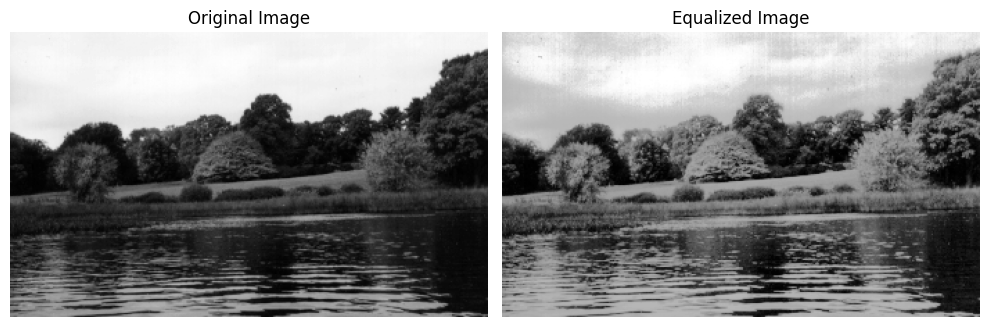

In [27]:


def equalize_histogram(image):
    # Convert the image to grayscale if it's not already
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Equalize the histogram
    equalized_image = cv2.equalizeHist(image)
    
    return equalized_image

# Load the grayscale image
image_path = "./images/autumn.tif"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Equalize the histogram
equalized_image = equalize_histogram(image)

# Display the original and equalized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')
plt.tight_layout()
plt.show()
